Some funcions are used above the section it actually defined.So run all the sectons 2 times to run the actual code

In [20]:
# data reading and splitting them into test and train data randomly


import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
data = pd.read_csv('decision_Tree/train.csv', delimiter = ',' )
# data = pd.read_csv('decision_Tree/sample_test.csv', delimiter = ',' )

data_read= data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','sales','salary','left']]
header = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','sales','salary','left']
header1 = ['Work_accident','promotion_last_5years','sales','salary','left']
sample_data = data_read[['Work_accident' ,'promotion_last_5years','sales','salary','left']].head(10)
# data_random=data_read.apply(np.random.permutation)
data_random=data_read
train_data = data_random.head(8737)
test_data = data_random.tail(2500)
is_numeric=[1,1,1,1,1,0,0,0,0]
# for i in range(len(data_read.values[0])-1):
#     if(len(unique_val(data_read,i))>10):
#         is_numeric.append(1)
#     else:
#         is_numeric.append(0)

most_prob=0
if(data_read.left.sum()>len(data_read)/2):
    most_prob=1

trw = Tree()

# l = sample_data
# l[l[header1[4]]>0.5]



# d=test_data.values[:,0]






FileNotFoundError: File b'decision_Tree/train.csv' does not exist

In [ ]:

##categorical data decision tree
test_data1 = test_data[['Work_accident' ,'promotion_last_5years','sales','salary','left' ]]
train_data1 = train_data[['Work_accident' ,'promotion_last_5years','sales','salary','left']]

# sample = ['sales','IT']
# a = []
# a.append(train_data1[train_data1[head1[2]] == sample[0]])
# a.append(train_data1[train_data1[head1[2]] == sample[1]])
# a[0]









In [2]:
def split(dataset,idx):
    groups = []
    uniq = list(unique_val(dataset,idx))
    
    for i in range(len(uniq)):
        groups.append(dataset[dataset[header[idx]]==uniq[i]])
    
    return groups



In [3]:
def split_num(dataset,idx,val):
    groups = []
    a = dataset[dataset[header[idx]]<=val]
    b = dataset[dataset[header[idx]]>val]
    groups.append(a)
    groups.append(b)
    del(a)
    del(b)
    return groups

    

In [4]:
#to fin the best value to split on numerical data
def best_cut_num(dataset,idx):
    lt = unique_val(dataset,idx)
    length = len(lt)
#     if(length>50):
#         random.shuffle(lt)
#         length = 50
    split_grp=[]
    
    total_count=dataset.left.sum()
    size = len(dataset)
    ent = entropy(total_count,size)
    avg=0
    final_avg=0
    info = 0
    best_cut = 0
    
    for i in range(length):
        avg=0
        t=split_num(dataset,idx,lt[i])
        for j in range(len(t)):
            sz = len(t[j])
            ct = t[j].left.sum()
            avg = avg+ (sz/size)*entropy(ct,sz)
            
        if((ent-avg)>info):
            info = ent-avg
            best_cut = lt[i]
            final_avg=avg
            
    return best_cut,final_avg
            
 
        
    
    

In [5]:
def unique_val(dataset,col):
    return list(set([data[col] for data in dataset.values]))





In [6]:
def best_split(dataset):
    sz = len(dataset.values[0])-1
    best = -1
    info = -1
    
    size = len(dataset)
    total_count = dataset.left.sum()
    for i in range(sz):
        avg=0
        ent=0
        if(is_numeric[i] == 0):
            t=list(dataset.groupby(header[i]).left.sum())
            t1=list(dataset.groupby(header[i]).size())
            sz_t = len(t)
            for j in range(sz_t):
                avg = avg+ (t1[j]/size)*entropy(t[j],t1[j])
        else:
            best_cut,avg = best_cut_num(dataset,i)
            
        ent = entropy(total_count,size)
        
        info_gain = ent - avg
#         print( i)
#         print('info',info_gain)

        if(info_gain>info):
            info = info_gain
            
            best = i
    return best


        
    
    
    
    
    
   



In [7]:
def entropy(count ,size):
    if(count==size or count == 0):
        return  0
    y = count/size 
    n = 1-y 
    ent = -n*math.log(n) - y*math.log(y)
    return ent

    


In [8]:
# class Node:
   
#     def __init__(self,
#                  true_branch,
#                  false_branch):
#         self.true_branch = true_branch
#         self.false_branch = false_branch
    
class Tree(object):
    def __init__(self):
        self.name = None
        self.child = []
        self.data = []
        self.value = -1
 
    def createChildren(self,amount):
        for i in range(0,amount):
            self.child.append(Tree())
 
    def setChildrenValues(self,list):
        for i in range(0,len(list)):
            self.data.append(list[i])
    def setVal(self,val):
        self.value = val
    def setName(self,nam):
        self.name = nam
        

In [9]:
def terminal_node(dataset):
    t = dataset.left.sum()
    t1 = len(dataset)
    if(t >= t1-t):
        return 1
    return 0

        

BUILDING TREE 

In [10]:
##builds tree

def build_tree(dataset,max_depth,depth,tr):
    if(depth==max_depth):
        tr.setVal(terminal_node(dataset))
        return tr
        
        
    if( dataset.left.sum() == len(dataset) or  dataset.left.sum() == 0):
        tr.setVal(terminal_node(dataset))
        return tr
    
    a = best_split(dataset)
    if(len(unique_val(dataset,a))==1):
        tr.setVal(terminal_node(dataset))
        return tr
        
    
    if(a == -1):
        tr.setVal(terminal_node(dataset))
        return tr
    
#     if(is_numeric[a]==1 and len(unique_val(dataset,a))<2):
#         tr.setVal(terminal_node(dataset))
#         return tr
    if(len(dataset)<3):
        tr.setVal(terminal_node(dataset))
        return tr
        
    
    
    if(is_numeric[a]==0):
        parts = unique_val(dataset,a)
        uniq_len = len(parts)
        tr.createChildren(uniq_len)
        tr.setChildrenValues(parts)
        
    if(is_numeric[a]==1):
        best_n,avg =  best_cut_num(dataset,a)
        parts=[best_n,10000]
        uniq_len = 2
        tr.createChildren(uniq_len)
        tr.setChildrenValues(parts)
    tr.setName(a)

    if(is_numeric[a]==0):
        grp = split(dataset,a)
    else:
        best_cut,avg = best_cut_num(dataset,a)
        grp = split_num(dataset,a,best_cut)
        

    for i in range(uniq_len):
        build_tree(grp[i],max_depth,depth+1,tr.child[i])
    del(grp)
    return tr
        
        
        
t = Tree()
tr_data = train_data.sample(1500)
trw=build_tree(data_read,3,0,t)
trw.child[0].name
    
    
        
        
    
    
    
    
    
    


NameError: name 'train_data' is not defined

In [11]:
## predicts outcome for a single row

def check(dataset,mytree):
#     print(len(mytree.child))
    if(len(mytree.child)==0):
#         print('done',mytree.value)
        
        return mytree.value
    
    l = len(mytree.child)
        
    for i in range(l):
        if(is_numeric[mytree.name]==1):
#                 print('mytree num')
#                 print(mytree.name)
#                 print('num')
            if(dataset[mytree.name] < mytree.data[0]):
                return check(dataset,mytree.child[0])
#                     print('num1 child name')
#                     print(mytree.name)
                
            else:
                return check(dataset,mytree.child[1])
#                     print('num2 child name')
#                     print(mytree.name)
                
        else:
#                 print('mytree cat')
#                 print(mytree.name)
            if(dataset[mytree.name]==mytree.data[i]):
                return check(dataset,mytree.child[i])
#                     print('category child name')
#                     print(mytree.name)
                
    
    

   below 4 functions takes list of predicted outcome and list of actual outcome and gives recall,accuracy,precision and f1 score

In [12]:
##RECALL

def recall(predicted_output,actual_output):
    tp=sum(actual_output)
    fn=0.0
    l = len(predicted_output)
    for i in range(l):
        if(actual_output[i]==1 and predicted_output[i]==0):
            fn=fn+1
    return tp/(tp+fn)

In [13]:
## PRECISION

def precision(predicted_output,actual_output):
    tp=sum(actual_output)
    fp=0.0
    l = len(predicted_output)
    for i in range(l):
        if(actual_output[i]==0 and predicted_output[i]==1):
            fp=fp+1
    return tp/(tp+fp)
    
    

In [14]:
##F1 SCORE

def f1_score(predicted_output,actual_output):
    tp=sum(actual_output)
    l = len(predicted_output)
    fp=0.0
    fn=0.0
    for i in range(l):
        if(actual_output[i]==1 and predicted_output[i]==0):
            fn=fn+1
    
    for i in range(l):
        if(actual_output[i]==0 and predicted_output[i]==1):
            fp=fp+1
    return 2*tp/(2*tp+fp+fn)
    
    

In [15]:
## Accuracy

def accuracy(predicted_output,actual_output):
    l = len(predicted_output)
    out=0
    for i in range(l):
        if(predicted_output[i]==actual_output[i]):
            out=out+1
    return out/l
            
    
    

this function evaluates the dataset and returns the list of predicted outcomes and list of actual outcomes

In [16]:
##PREDICT THE OUTCOME FOR DATASET


def evaluate(dataset,mytree):
    check_data = dataset[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','sales','salary','left']]
    #check_data = dataset[['Work_accident' ,'promotion_last_5years','sales','salary','left']]
    length = len(check_data)
    len_val = len(check_data.values[0])
    predicted_outcome = []
    actual_outcome = []
    matched_outcome = []
    
    for i in range(length):
#         print(check_data.values[i])
        c=check(check_data.values[i],mytree)
        predicted_outcome.append(c)
        actual_outcome.append(check_data.values[i][len_val-1])
#         print ('c')
#         print(c)
        if(c==check_data.values[i][len_val-1]):
            
            matched_outcome.append(1)
        else:
            
            matched_outcome.append(0)
   
    return predicted_outcome,actual_outcome
            
        




# build_tree(train_data,7,0,trw)





    


In [17]:
def testing(dataset,mytree):
    check_data = dataset[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','sales','salary']]
    #check_data = dataset[['Work_accident' ,'promotion_last_5years','sales','salary','left']]
    length = len(check_data)
    len_val = len(check_data.values[0])
    predicted_outcome = []
   
    
    for i in range(length):
#         print(check_data.values[i])
        c=check(check_data.values[i],mytree)
        predicted_outcome.append(c)

    return predicted_outcome
            
        

#   PART 2



In [18]:
predicted_out,actual_out = evaluate(test_data,trw)
print('Accuracy :',accuracy(predicted_out,actual_out))
print('F1 Score :',f1_score(predicted_out,actual_out))
print('Recall :',recall(predicted_out,actual_out))
print('Precision :',precision(predicted_out,actual_out))

NameError: name 'test_data' is not defined

In [19]:
## To test the dataset uncomment below lines

# test = pd.read_csv('filename', delimiter = ',' )
# a = testing(dataset,trw)
# a

# PART 3

Misclassification error, Gini and Entropy are the three most commonly used impurity measures in case of decision trees.

Entropy = -∑j  pj log2pj

Gini = 1 - Σp2j

Classification Error = 1 - max pj

Gini and entropy are pretty much the same, although the formula for both is different. In general, these two are used interchangeably.
The entropy is 0 if all samples of a node belong to the same class, and the entropy is maximal if we have a uniform class distribution. In other words, the entropy of a node (consist of single class) is zero because the probability is 1 and log (1) = 0. Entropy reaches maximum value when all classes in the node have equal probability.

# PART 4

plot of satisfaction level and last evaluation.Plots may change as i have taken train and validation set randomly

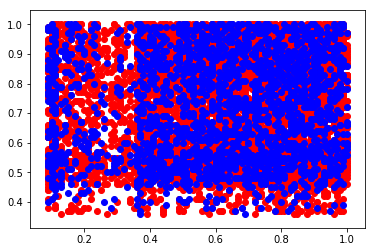

In [137]:
x1,y1 = [], []
x2,y2 = [], []

for dt in range(len(train_data)):
    if(train_data.values[dt][9]==0):
        x1.append(train_data.values[dt][0])
        y1.append(train_data.values[dt][1])
    else:
        x2.append(train_data.values[dt][0])
        y2.append(train_data.values[dt][1])
        
plt.scatter(x1, y1, color='r')
plt.scatter(x2, y2, color='b')
plt.title()
plt.show()

# PART 6

There are several methods used by various decision trees. We can simply ignore the missing values or treating the missing values as another category are not real handling missing values. 

The real handling approaches to missing data does not use data point with missing values in the evaluation of a split. However, when child nodes are created and trained, those instances are distributed somehow.

The following approaches to distribute the missing value instances to child nodes:

1. All goes to the node which already has the biggest number of instances (CART, is not the primary rule)
distribute to all children, but with diminished weights, proportional with the number of instances from each child node (C45 and others)
2. Distribute randomly to only one single child node, eventually according with a categorical distribution (I have seen that in various implementations of C45 and CART for a faster running time)
3. Build, sort and use surrogates to distribute instances to a child node, where surrogates are input features which resembles best how the test feature send data instances to left or right child node (CART, if that fails, the majority rule is used)